# A/B TESTING

In this practice case I used the dataset that I found in kaggle below : https://www.kaggle.com/yufengsui/mobile-games-ab-testing. The dataset used **cookie cats** is a dataset about a mobile game about the retention player after 1 days and 7 days installation and  the number of game rounds played by the player during the first week after installation.

## 1. Project Background

Cookie Cats is a hugely popular mobile puzzle game developed by Tactile Entertainment. It's a classic "connect three"-style puzzle game where the player must connect tiles of the same color to clear the board and win the level. It also features singing cats.

As players progress through the levels of the game, they will occasionally encounter gates that force them to wait a non-trivial amount of time or make an in-app purchase to progress. In addition to driving in-app purchases, these gates serve the important purpose of giving players an enforced break from playing the game, hopefully resulting in that the player's enjoyment of the game being increased and prolonged.

But where should the gates be placed? Initially the first gate was placed at level 30. **In this project, we're going to analyze an AB-test where we moved the first gate in Cookie Cats from level 30 to level 40. In particular, we will look at the impact on player retention.**

## 2. Decription Feature

- userid : a unique number that identifies each player.
- version : whether the player was put in the **control group** (gate_30 - a gate at level 30) or the **test group** (gate_40 - a gate at level 40).
- sum_gamerounds : the number of game rounds played by the player during the first week after installation
- retention_1 : did the player come back and play 1 day after installing?
- retention_7 : did the player come back and play 7 day after installing?

## 3. Analysis

### Installing libraries

In [1]:
#Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Reading Dataset

In [2]:
#Read data
dataset=pd.read_csv('cookie_cats.csv')
dataset.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


### View Dataset Size

In [3]:
dataset.shape

(90189, 5)

It appears that there are 90189 rows and 5 columns.

### View Dataset Type of Feature

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
userid            90189 non-null int64
version           90189 non-null object
sum_gamerounds    90189 non-null int64
retention_1       90189 non-null bool
retention_7       90189 non-null bool
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


### Detection Missing Values

In [5]:
#detection missing values each variables of data
count_missing = dataset.isnull().sum().sort_values(ascending = False)
count_missing

retention_7       0
retention_1       0
sum_gamerounds    0
version           0
userid            0
dtype: int64

There is no missing value in the dataset.

### Dropping Unusefull Feature

In [6]:
#In here i want get A/B testing of player come back and play day after installing

dataset=dataset.drop(['retention_1', 'userid'], axis=1)

In this dataset, I only use the feature **'version', 'sum_gamerounds', and 'retention_7'**. I only use 'retention_7' because I want to see if the players reuse cookies cats after 7 days. I feel retention_1, don't use because it is still too few days used.

In [7]:
dataset.head()

,version,sum_gamerounds,retention_7
0,gate_30,3,False
1,gate_30,38,False
2,gate_40,165,False
3,gate_40,1,False
4,gate_40,179,True


### Get Dataset Control and Test(Variation)

In [8]:
data_control=dataset[dataset['version']=='gate_30']
data_control.head()

,version,sum_gamerounds,retention_7
0,gate_30,3,False
1,gate_30,38,False
6,gate_30,0,False
11,gate_30,0,False
13,gate_30,39,False


In [9]:
data_test=dataset[dataset['version']=='gate_40']
data_test.head()

,version,sum_gamerounds,retention_7
2,gate_40,165,False
3,gate_40,1,False
4,gate_40,179,True
5,gate_40,187,True
7,gate_40,2,False


### Exploring Data

In [10]:
data_control.groupby('retention_7').count()

,version,sum_gamerounds
retention_7,,
False,36198,36198
True,8502,8502


From the count result for the data_control it looks that for the number of players who don't come back and play after 7 days installation more than on the number of players who come back and play both for version and sum_gamerounds.

In [11]:
data_test.groupby('retention_7').count()

,version,sum_gamerounds
retention_7,,
False,37210,37210
True,8279,8279


From the count result for the data_test it looks that for the number of players who don't come back and play after 7 days installation more than on the number of players who come back and play both for version and sum_gamerounds.

**Note:**
From the above result there is no significant difference between data_control and data_test. So, to see if there is a statistical difference can be used Z test. Z test will be used in the next step.

### Visualizasing Data

In this Below is a visualization of the difference retention for data_control.

Text(0.5,0,'Type of retention 7 days')

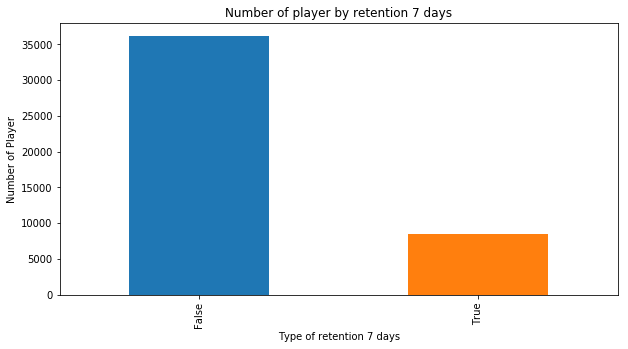

In [12]:
data_control['retention_7'].value_counts().nlargest(100).plot(kind='bar', figsize=(10,5))
plt.title("Number of player by retention 7 days")
plt.ylabel('Number of Player')
plt.xlabel('Type of retention 7 days')

In this Below is a visualization of the difference retention for data_test.

Text(0.5,0,'Type of retention 7 days')

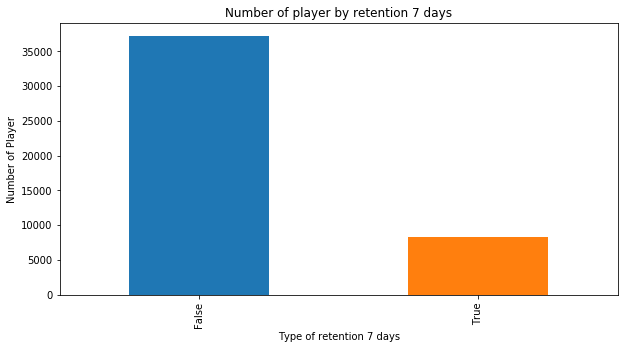

In [13]:
data_test['retention_7'].value_counts().nlargest(100).plot(kind='bar', figsize=(10,5))
plt.title("Number of player by retention 7 days")
plt.ylabel('Number of Player')
plt.xlabel('Type of retention 7 days')

### Z Test for A/B Testing

In [14]:
#Import Libraries
import pandas as pd
import numpy as np
from scipy import stats
from statsmodels.stats import weightstats as stests

In this case, I use Z test to compare two populations whether the same or different. The first population is a data_control population while the second population is data_test population or its variation. In this test will be generated whether there is a difference between data_control and data_test based on the Retention and based on the sum_gameround of each user/player.

In [17]:
def Z_test(datacontrol,datatest) :
    datacontrol_mean=np.mean(datacontrol)
    datatest_mean=np.mean(datatest)
    datacontrol_std=np.std(datacontrol)
    datatest_std=np.std(datatest)
    ztest ,pval1 = stests.ztest(datacontrol, x2=datatest, value=0,alternative='two-sided')
    decision1="reject null hypothesis"
    decision2="accept null hypothesis"
    decision= decision1 if pval1<0.05 else decision2
    
    tabel=pd.DataFrame()
    tabel['Data']=['Control','Group']
    tabel['Mean']=[datacontrol_mean,datatest_mean]
    tabel['Standar_Dev']=[datacontrol_std,datatest_std]
    tabel['Z_Score']=[ztest,'']
    tabel['P-Value']=[pval1,'']
    tabel['Decision']=[decision,'']
    return tabel

**Z test Retention_7**
1. Hypothesis
    - H0 : There is difference between data_control and data_test based on Retention
    - H1 : There is no difference between data_control and data_test based on Retention
2. Significant Level
    - alpha = 0.05
3. Test Statistics
    - p-value
4. Critic Area
   - reject null hyphothesis if p-value < alpha

In [18]:
 Z_test(data_control['retention_7'],data_test['retention_7'])

,Data,Mean,Standar_Dev,Z_Score,P-Value,Decision
0,Control,0.190201,0.392460,3.1645,0.0015535,reject null hypothesis
1,Group,0.182000,0.385845,,,


**Conclusion**

From the results above it appears that the results Z test for retention_7 is to reject the null hypothesis which means there is no difference in average population control (Gate_30) and test (GATE_40) in retention action after 7 days of installation. 

**Z Test Sum_Gamerounds**
1. Hypothesis
    - H0 : There is difference between data_control and data_test based on sum_gamerounds
    - H1 : There is no difference between data_control and data_test based sum_gamerounds
2. Significant Level
    - alpha = 0.05
3. Test Statistics
    - p-value
4. Critic Area
   - reject null hyphothesis if p-value < alpha

In [19]:
Z_test(data_control['sum_gamerounds'],data_test['sum_gamerounds'])

,Data,Mean,Standar_Dev,Z_Score,P-Value,Decision
0,Control,52.456264,256.713552,0.891043,0.372906,accept null hypothesis
1,Group,51.298776,103.293281,,,


**Conclusion**

From the results above it appears that the results Z test for sum_gamerounds is to reject the null hypothesis which means there is difference in average population control (Gate_30) and test (GATE_40) in  sum_gamerounds action.

## 4. Conclusion and Recomendations

**Conclusion**

After seeing the results of A/B testing It appears that there is no difference in the number of players who perform retention on gate_30 and gate_40 but there are differences sum_gameround player at the gate_30 and gate_40 stage.
Looking at these conditions, maybe sometimes people who already at the gate_40 stage have been bored of the game and the type of games that are monotonous or not too much challeng that could affect the retention palyer.
Further see the difference in the number of rounds of his game, the player does different things to the sum round game that they use on gate_30 and gate_40.

**Recomendation**

- Attracting new customers and increasing the traffic to the mobile games are only the first part of the marketing activity. When sales and the number of customers increase, the cookies cats reaches certain financial stability, so, the next stage of the marketing campaign is the retention and increase in customer loyalty. The main tool for increasing confidence of cookies cats players is the launch of a fair loyalty program aimed at building long-term relationships with customers. An online cookies cats loyalty program should be available to all players after registration and depositing. This program often includes an extensive system of bonuses and promotions held every day, week, or month. The program may contain several levels, which provide a player with a special status, allowing to exchange bonuses and points for real money. In addition, prize giveaways are popular among the most active players. The loyalty program is very effective, as it enhances customer confidence and helps in user retention.
- Online cookies cats games should meet the requirements and desires of the target audience. Game content is a reason why people come to the casino website, so the wide range of them will allow every player to find something interesting for himself or herself. It is important to choose games from well-known providers, which are of high quality and have broad functionality. Operators should also take into account the region of operation, as the game interface should better correspond with the cultural background of players. Moreover, the gaming content should be constantly updated. It is necessary to monitor market trends and regularly offer players new games.